<a href="https://colab.research.google.com/github/alexersej/git-test/blob/master/pokemon_teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE: AI have been used to develop these code blocks, to help me visualize the desired networks

In [71]:
import pandas as pd
import networkx as nx
import altair as alt
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from networkx.algorithms import bipartite
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

In [72]:
pip install pandas networkx altair

In [73]:
df = pd.read_csv('pokemon_ds.csv', sep=';')
df.head()

,Trainer,Role,Generation,Pokemon,Type 1,Type 2,Introduced,Kind
0,Brock,Gym Leader,1,Geodude,Rock,Ground,Yes,Normal
1,Brock,Gym Leader,1,Onix,Rock,Ground,Yes,Normal
2,Misty,Gym Leader,1,Staryu,Water,NaN,Yes,Normal
3,Misty,Gym Leader,1,Starmie,Water,Psychic,Yes,Normal
4,Lieutenant Surge,Gym Leader,1,Voltorb,Electric,NaN,Yes,Normal


In [74]:
df['Role'].value_counts()

,count
Role,
Gym Leader,320
Player,284
Elite Four,219
Champion,66


In [75]:
# Filter for players
player_df = df[df['Role'] == 'Player']

#Filter for non-players
non_player_df = df[df['Role'] != 'Player']

In [76]:
try:
    df = pd.read_csv('pokemon_ds.csv', sep=';')
except FileNotFoundError:
    print("Error: pokemon_ds.csv not found. Please ensure the file exists and the path is correct.")
    exit()


#Count how many times each "role" appears in the dataset
df['Role'].value_counts()

# Filter for players
player_df = df[df['Role'] == 'Player']

#Filter for non-players
non_player_df = df[df['Role'] != 'Player']


def top_10_pokemon(df, df_name):
    try:
        pokemon_counts = df['Pokemon'].value_counts().head(10)
        print(f"Top 10 Pokémon in {df_name}:")
        print(pokemon_counts)
        print("\n")
    except KeyError:
        print(f"Error: 'Pokemon' column not found in {df_name} DataFrame.")

top_10_pokemon(df, "pokemon_df")
top_10_pokemon(player_df, "player_df")
top_10_pokemon(non_player_df, "non_player_df")


Top 10 Pokémon in pokemon_df:
Pokemon
Gengar       15
Lucario      12
Dragonite    10
Lycanroc      8
Flygon        8
Gardevoir     8
Haxorus       8
Alakazam      7
Gyrados       7
Charizard     7
Name: count, dtype: int64


Top 10 Pokémon in player_df:
Pokemon
Gengar        8
Lucario       8
Greninja      7
Garchomp      6
Charizard     5
Gardevoir     5
Typhlosion    5
Swampert      5
Samurott      4
Raichu        4
Name: count, dtype: int64


Top 10 Pokémon in non_player_df:
Pokemon
Gengar       7
Flygon       7
Onix         6
Dragonite    6
Dragonair    5
Gyrados      5
Haxorus      5
Mr Mime      5
Skarmory     5
Altaria      5
Name: count, dtype: int64




In [77]:
# Filter for players and non-players
player_df = df[df['Role'] == 'Player']
non_player_df = df[df['Role'] != 'Player']

# Function to get top 10 Kind counts
def get_top_10_kind(df):
    return df['Kind'].value_counts().head(10)

# Get top 10 Kind for the overall dataset
top_10_kind_overall = get_top_10_kind(df)
print("Top 10 Kind Overall:\n", top_10_kind_overall)

# Get top 10 Kind for players
top_10_kind_players = get_top_10_kind(player_df)
print("\nTop 10 Kind for Players:\n", top_10_kind_players)

# Get top 10 Kind for non-players
top_10_kind_non_players = get_top_10_kind(non_player_df)
print("\nTop 10 Kind for Non-Players:\n", top_10_kind_non_players)


Top 10 Kind Overall:
 Kind
Normal       744
Starter       67
Pseudo        43
Legendary     35
Name: count, dtype: int64

Top 10 Kind for Players:
 Kind
Normal       175
Starter       53
Legendary     35
Pseudo        21
Name: count, dtype: int64

Top 10 Kind for Non-Players:
 Kind
Normal     569
Pseudo      22
Starter     14
Name: count, dtype: int64


In [78]:
try:
    df = pd.read_csv('pokemon_ds.csv', sep=';')
except FileNotFoundError:
    print("Error: pokemon_ds.csv not found. Please ensure the file exists and the path is correct.")
    exit()

# Filter for players and non-players
player_df = df[df['Role'] == 'Player']
non_player_df = df[df['Role'] != 'Player']

# Function to get top 10 Kind counts
def get_top_10_kind(df):
    return df['Kind'].value_counts().head(10)

# Get top 10 Kind for the overall dataset
top_10_kind_overall = get_top_10_kind(df)

# Get top 10 Kind for players
top_10_kind_players = get_top_10_kind(player_df)

# Get top 10 Kind for non-players
top_10_kind_non_players = get_top_10_kind(non_player_df)

# Create the interactive histogram
fig = go.Figure()

# Add traces for each dataset
fig.add_trace(go.Bar(x=top_10_kind_overall.index, y=top_10_kind_overall.values, name='Overall', marker_color='blue'))
fig.add_trace(go.Bar(x=top_10_kind_players.index, y=top_10_kind_players.values, name='Players', marker_color='green'))
fig.add_trace(go.Bar(x=top_10_kind_non_players.index, y=top_10_kind_non_players.values, name='Non-Players', marker_color='red'))


fig.update_layout(
    title='Top 10 Pokémon Kinds',
    xaxis_title='Kind',
    yaxis_title='Count',
    barmode='group'
)

fig.show()


In [79]:
# Combine Type 1 and Type 2 counts for the entire dataset
combined_counts = df['Type 1'].value_counts().add(df['Type 2'].value_counts(), fill_value=0).sort_values(ascending=False).head(18)
print("Top 18 combined Type 1 and Type 2 overall:\n", combined_counts)

# Combine Type 1 and Type 2 counts for players
player_combined_counts = player_df['Type 1'].value_counts().add(player_df['Type 2'].value_counts(), fill_value=0).sort_values(ascending=False).head(18)
print("\nTop 18 combined Type 1 and Type 2 for players:\n", player_combined_counts)

# Combine Type 1 and Type 2 counts for non-players
non_player_combined_counts = non_player_df['Type 1'].value_counts().add(non_player_df['Type 2'].value_counts(), fill_value=0).sort_values(ascending=False).head(18)
print("\nTop 18 combined Type 1 and Type 2 for non-players:\n", non_player_combined_counts)


Top 18 combined Type 1 and Type 2 overall:
 Flying      123
Water       120
Ghost        96
Psychic      94
Steel        94
Dragon       93
Fighting     91
Ground       89
Fire         81
Dark         81
Poison       79
Rock         75
Grass        69
Electric     65
Fairy        65
Normal       53
Ice          51
Bug          45
Name: count, dtype: int64

Top 18 combined Type 1 and Type 2 for players:
 Ghost       44
Flying      41
Dragon      38
Water       38
Fire        34
Dark        33
Psychic     29
Electric    29
Steel       29
Fighting    27
Ground      27
Poison      22
Grass       21
Fairy       21
Rock        14
Normal      14
Ice         12
Bug         11
Name: count, dtype: int64

Top 18 combined Type 1 and Type 2 for non-players:
 Water       82
Flying      82
Psychic     65
Steel       65
Fighting    64
Ground      62
Rock        61
Poison      57
Dragon      55
Ghost       52
Grass       48
Dark        48
Fire        47
Fairy       44
Ice         39
Normal      39
Elec

In [80]:
fig = go.Figure()

# Add traces for each dataset
fig.add_trace(go.Bar(x=player_combined_counts.index, y=player_combined_counts.values, name='Players', marker_color='green'))
fig.add_trace(go.Bar(x=non_player_combined_counts.index, y=non_player_combined_counts.values, name='Non-Players', marker_color='red'))


fig.update_layout(
    title='Combined Type 1 and Type 2 Counts',
    xaxis_title='Type',
    yaxis_title='Count',
    barmode='group'
)

fig.show()


In [81]:
# Filter for players and non-players
player_df = df[df['Role'] == 'Player']
non_player_df = df[df['Role'] != 'Player']

def top_2_introduced(df):
    return df['Introduced'].value_counts().head(2)

# Get top 2 introduced for the overall dataset
top_2_introduced_overall = top_2_introduced(df)
print("Top 2 Introduced Overall:\n", top_2_introduced_overall)

# Get top 2 introduced for players
top_2_introduced_players = top_2_introduced(player_df)
print("\nTop 2 Introduced for Players:\n", top_2_introduced_players)

# Get top 2 introduced for non-players
top_2_introduced_non_players = top_2_introduced(non_player_df)
print("\nTop 2 Introduced for Non-Players:\n", top_2_introduced_non_players)


Top 2 Introduced Overall:
 Introduced
Yes    438
No     331
Name: count, dtype: int64

Top 2 Introduced for Players:
 Introduced
Yes    157
No       7
Name: count, dtype: int64

Top 2 Introduced for Non-Players:
 Introduced
No     324
Yes    281
Name: count, dtype: int64


In [82]:
fig = go.Figure()

# Add traces for each dataset
fig.add_trace(go.Bar(x=top_2_introduced_overall.index, y=top_2_introduced_overall.values, name='Overall', marker_color='blue'))
fig.add_trace(go.Bar(x=top_2_introduced_players.index, y=top_2_introduced_players.values, name='Players', marker_color='green'))
fig.add_trace(go.Bar(x=top_2_introduced_non_players.index, y=top_2_introduced_non_players.values, name='Non-Players', marker_color='red'))

fig.update_layout(
    title='Top 2 Pokémon Introduced',
    xaxis_title='Introduced',
    yaxis_title='Count',
    barmode='group'
)

fig.show()


In [83]:
# Filter for players and non-players
player_df = df[df['Role'] == 'Player']
non_player_df = df[df['Role'] != 'Player']

# Find Pokemon in both
both = set(player_df['Pokemon']).intersection(set(non_player_df['Pokemon']))
both_count = len(both)
print(f"Number of Pokemon in both: {both_count}")

# Find Pokemon only in one
only_player = set(player_df['Pokemon']).difference(set(non_player_df['Pokemon']))
only_non_player = set(non_player_df['Pokemon']).difference(set(player_df['Pokemon']))
only_one_count = len(only_player) + len(only_non_player)
print(f"Number of Pokemon in only one: {only_one_count}")

# Calculate the final result
result = 1025 - both_count - only_one_count
print(f"1025 - (Pokemon in both) - (Pokemon in only one): {result}")


Number of Pokemon in both: 101
Number of Pokemon in only one: 313
1025 - (Pokemon in both) - (Pokemon in only one): 611


In [84]:
# Filter for players and non-players
player_df = df[df['Role'] == 'Player']
non_player_df = df[df['Role'] != 'Player']

# Count unique Pokemon in each DataFrame
unique_pokemon_df = len(df['Pokemon'].unique())
unique_pokemon_player = len(player_df['Pokemon'].unique())
unique_pokemon_non_player = len(non_player_df['Pokemon'].unique())

print(f"Unique Pokemon in pokemon_df: {unique_pokemon_df}")
print(f"Unique Pokemon in player_df: {unique_pokemon_player}")
print(f"Unique Pokemon in non_player_df: {unique_pokemon_non_player}")


Unique Pokemon in pokemon_df: 414
Unique Pokemon in player_df: 157
Unique Pokemon in non_player_df: 358


In [85]:
def combined_type_top_5(df, df_name):
    for generation in df['Generation'].unique():
        gen_df = df[df['Generation'] == generation]
        combined_counts = gen_df['Type 1'].value_counts().add(gen_df['Type 2'].value_counts(), fill_value=0)
        top_5 = combined_counts.sort_values(ascending=False).head(5)
        print(f"Top 5 combined types for {df_name} in Generation {generation}:\n{top_5}\n")

combined_type_top_5(player_df, "player_df")
combined_type_top_5(non_player_df, "non_player_df")


Top 5 combined types for player_df in Generation 1:
Poison    13.0
Flying    11.0
Ghost      8.0
Water      7.0
Fire       6.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 2:
Dark      7.0
Bug       6.0
Flying    6.0
Fire      6.0
Water     5.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 3:
Psychic    9.0
Flying     7.0
Grass      6.0
Dragon     6.0
Ground     6.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 4:
Ground      11.0
Fighting    10.0
Dragon      10.0
Steel       10.0
Ghost        6.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 5:
Dark      7.0
Dragon    7.0
Fire      5.0
Ghost     5.0
Water     4.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 6:
Dark       9.0
Water      7.0
Fairy      6.0
Ghost      6.0
Psychic    4.0
Name: count, dtype: float64

Top 5 combined types for player_df in Generation 7:
Ghost       

In [86]:
#Build bipartite grap
B = nx.Graph()
for _, row in player_df.iterrows():
    trainer = row['Trainer']
    pokemon = row['Pokemon']
    B.add_node(trainer, kind='trainer')
    B.add_node(pokemon, kind='pokemon', type1=row['Type 1'], type2=row['Type 2'], generation=row['Generation'])
    B.add_edge(trainer, pokemon)

# Project Pokémon–Pokémon network
pokemon_nodes = [n for n, d in B.nodes(data=True) if d['kind'] == 'pokemon']
P = bipartite.weighted_projected_graph(B, pokemon_nodes)

# Generate layout
pos = nx.spring_layout(P, k=0.8)

# Build edges for Plotly
edge_x = []
edge_y = []
for edge in P.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Build nodes with hover info
node_x = []
node_y = []
hover_text = []
for node in P.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    data = B.nodes[node]
    text = f"{node}<br>Type 1: {data.get('type1')}<br>Type 2: {data.get('type2')}<br>Gen: {data.get('generation')}"
    hover_text.append(text)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    hovertext=hover_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        color=[P.degree(n) for n in P.nodes()],
        size=20,
        colorbar=dict(thickness=15, title='Connections', xanchor='left', titleside='right'),
        line_width=2
    )
)

# Show interactive network
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Pokémon Network (Players)',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, visible=False),
                    yaxis=dict(showgrid=False, zeroline=False, visible=False),
                    plot_bgcolor='white'
                ))
fig.show()


In [87]:
# Build bipartite graph from player_df
B = nx.Graph()
for _, row in player_df.iterrows():
    trainer = row['Trainer']
    pokemon = row['Pokemon']
    B.add_node(trainer, kind='trainer')
    B.add_node(pokemon, kind='pokemon', type1=row['Type 1'], type2=row['Type 2'], generation=row['Generation'])
    B.add_edge(trainer, pokemon)

# Project to Pokémon–Pokémon network
pokemon_nodes = [n for n, d in B.nodes(data=True) if d['kind'] == 'pokemon']
P = nx.bipartite.weighted_projected_graph(B, pokemon_nodes)

# Filter nodes with degree > 5
nodes_to_keep = [n for n in P.nodes if P.degree(n) > 5]
P_filtered = P.subgraph(nodes_to_keep).copy()

# Layout
pos = nx.spring_layout(P_filtered, k=0.8, seed=42)

# Create nodes dataframe for Altair
nodes = pd.DataFrame({
    'pokemon': list(P_filtered.nodes),
    'x': [pos[pokemon][0] for pokemon in P_filtered.nodes],
    'y': [pos[pokemon][1] for pokemon in P_filtered.nodes],
    'degree': [P_filtered.degree(pokemon) for pokemon in P_filtered.nodes],
    'type1': [B.nodes[pokemon].get('type1') for pokemon in P_filtered.nodes],
    'type2': [B.nodes[pokemon].get('type2') for pokemon in P_filtered.nodes],
    'generation': [B.nodes[pokemon].get('generation') for pokemon in P_filtered.nodes]
})

# Create edges dataframe for Altair
edges = pd.DataFrame([{
    'source': u,
    'target': v,
    'weight': data['weight'],
    'x': pos[u][0],
    'y': pos[u][1],
    'x2': pos[v][0],
    'y2': pos[v][1]
} for u, v, data in P_filtered.edges(data=True)])

# Create Altair chart for edges
edge_chart = alt.Chart(edges).mark_line(color='black').encode(
    x='x:Q',
    y='y:Q',
    x2='x2:Q',
    y2='y2:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges['weight'].min(), edges['weight'].max()], range=[0.1, 1]), title='Co-occurence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(nodes).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['pokemon', 'type1', 'type2', 'generation', 'degree'],
    color=alt.Color('degree:Q', scale=alt.Scale(scheme='blues'), title='Degree (Connections)')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=800,
    height=450,
    title="Pokémon Co-Occurrence Network (Players Only)"
)

# Remove axes and display the final chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart



alt.LayerChart(...)

In [88]:
clustering_dict = nx.clustering(P_filtered)

average_clustering = nx.average_clustering(P_filtered)

print(f"Average clustering coefficient of Network 2 (Player Pokémon co-occurrence): {average_clustering:.3f}")


Average clustering coefficient of Network 2 (Player Pokémon co-occurrence): 0.579


In [89]:
# Build bipartite graph
B = nx.Graph()
for _, row in non_player_df.iterrows():
    trainer = row['Trainer']
    pokemon = row['Pokemon']
    B.add_node(trainer, kind='trainer')
    B.add_node(pokemon, kind='pokemon', type1=row['Type 1'], type2=row['Type 2'], generation=row['Generation'])
    B.add_edge(trainer, pokemon)

# Project Pokémon–Pokémon network
pokemon_nodes = [n for n, d in B.nodes(data=True) if d['kind'] == 'pokemon']
P = bipartite.weighted_projected_graph(B, pokemon_nodes)

# Generate layout
pos = nx.spring_layout(P, k=0.8)

# Build edges for Plotly
edge_x = []
edge_y = []
for edge in P.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Build nodes with hover info
node_x = []
node_y = []
hover_text = []
for node in P.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    data = B.nodes[node]
    text = f"{node}<br>Type 1: {data.get('type1')}<br>Type 2: {data.get('type2')}<br>Gen: {data.get('generation')}"
    hover_text.append(text)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    hovertext=hover_text,
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        color=[P.degree(n) for n in P.nodes()],
        size=20,
        colorbar=dict(thickness=15, title='Connections', xanchor='left', titleside='right'),
        line_width=2
    )
)

# Show interactive network
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Pokémon Network (Non-Players)',
                    titlefont_size=20,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, visible=False),
                    yaxis=dict(showgrid=False, zeroline=False, visible=False),
                    plot_bgcolor='white'
                ))
fig.show()


In [90]:
# Build bipartite graph from non_player_df
B = nx.Graph()
for _, row in non_player_df.iterrows():
    trainer = row['Trainer']
    pokemon = row['Pokemon']
    B.add_node(trainer, kind='trainer')
    B.add_node(pokemon, kind='pokemon', type1=row['Type 1'], type2=row['Type 2'], generation=row['Generation'])
    B.add_edge(trainer, pokemon)

# Project to Pokémon–Pokémon network
pokemon_nodes = [n for n, d in B.nodes(data=True) if d['kind'] == 'pokemon']
P = nx.bipartite.weighted_projected_graph(B, pokemon_nodes)

# Filter nodes with degree > 5
nodes_to_keep = [n for n in P.nodes if P.degree(n) > 5]
P_filtered_np = P.subgraph(nodes_to_keep).copy()

# Layout
pos = nx.spring_layout(P_filtered_np, k=0.8, seed=42)

# Create nodes dataframe for Altair
nodes = pd.DataFrame({
    'pokemon': list(P_filtered_np.nodes),
    'x': [pos[pokemon][0] for pokemon in P_filtered_np.nodes],
    'y': [pos[pokemon][1] for pokemon in P_filtered_np.nodes],
    'degree': [P_filtered_np.degree(pokemon) for pokemon in P_filtered_np.nodes],
    'type1': [B.nodes[pokemon].get('type1') for pokemon in P_filtered_np.nodes],
    'type2': [B.nodes[pokemon].get('type2') for pokemon in P_filtered_np.nodes],
    'generation': [B.nodes[pokemon].get('generation') for pokemon in P_filtered_np.nodes]
})

# Create edges dataframe for Altair
edges = pd.DataFrame([{
    'source': u,
    'target': v,
    'weight': data['weight'],
    'x': pos[u][0],
    'y': pos[u][1],
    'x2': pos[v][0],
    'y2': pos[v][1]
} for u, v, data in P_filtered_np.edges(data=True)])

# Create Altair chart for edges
edge_chart = alt.Chart(edges).mark_line(color='black').encode(
    x='x:Q',
    y='y:Q',
    x2='x2:Q',
    y2='y2:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges['weight'].min(), edges['weight'].max()], range=[0.1, 1]), title='Co-occurence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(nodes).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['pokemon', 'type1', 'type2', 'generation', 'degree'],
    color=alt.Color('degree:Q', scale=alt.Scale(scheme='blues'), title='Degree (Connections)')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=800,
    height=450,
    title="Pokémon Co-Occurrence Network (Non-Players Only)"
)

# Remove axes and display the final chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart


alt.LayerChart(...)

In [91]:
clustering_dict_nonplayer = nx.clustering(P_filtered_np)

average_clustering_nonplayer = nx.average_clustering(P_filtered_np)

print(f"Average clustering coefficient of Network 3 (Non-Player Pokémon co-occurrence): {average_clustering_nonplayer:.3f}")


Average clustering coefficient of Network 3 (Non-Player Pokémon co-occurrence): 0.500


<ipython-input-92-84d68154cb61>:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



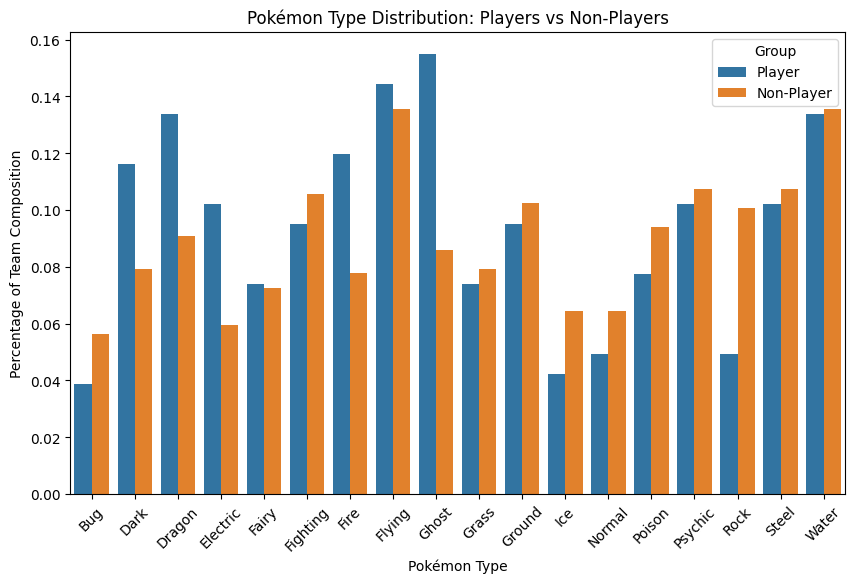

Cosine Similarity between players and non-players type distributions: 0.96


In [92]:
# Extract the Pokémon types for each team
def get_type_distribution(df):
    type_counts = df[['Type 1', 'Type 2']].apply(pd.Series.value_counts, axis=0).fillna(0)
    type_distribution = type_counts.sum(axis=1) / len(df)
    return type_distribution

# Calculate type distribution for players and non_players
player_types = get_type_distribution(player_df)
non_player_types = get_type_distribution(non_player_df)

# Calculate similarity
types = player_types.index
distribution_matrix = np.array([player_types, non_player_types])
similarity_score = cosine_similarity(distribution_matrix)[0, 1]

# Plot the distributions
fig, ax = plt.subplots(figsize=(10, 6))

# Combine the distributions into a DataFrame for easy plotting
type_distribution_df = pd.DataFrame({
    'Type': types,
    'Player': player_types.values,
    'Non-Player': non_player_types.values
})

# Melt for easy plotting with seaborn
type_distribution_df = type_distribution_df.melt(id_vars="Type", value_vars=["Player", "Non-Player"],
                                                 var_name="Group", value_name="Percentage")

sns.barplot(data=type_distribution_df, x='Type', y='Percentage', hue='Group', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Pokémon Type Distribution: Players vs Non-Players")
ax.set_ylabel("Percentage of Team Composition")
ax.set_xlabel("Pokémon Type")
plt.show()

print(f"Cosine Similarity between players and non-players type distributions: {similarity_score:.2f}")


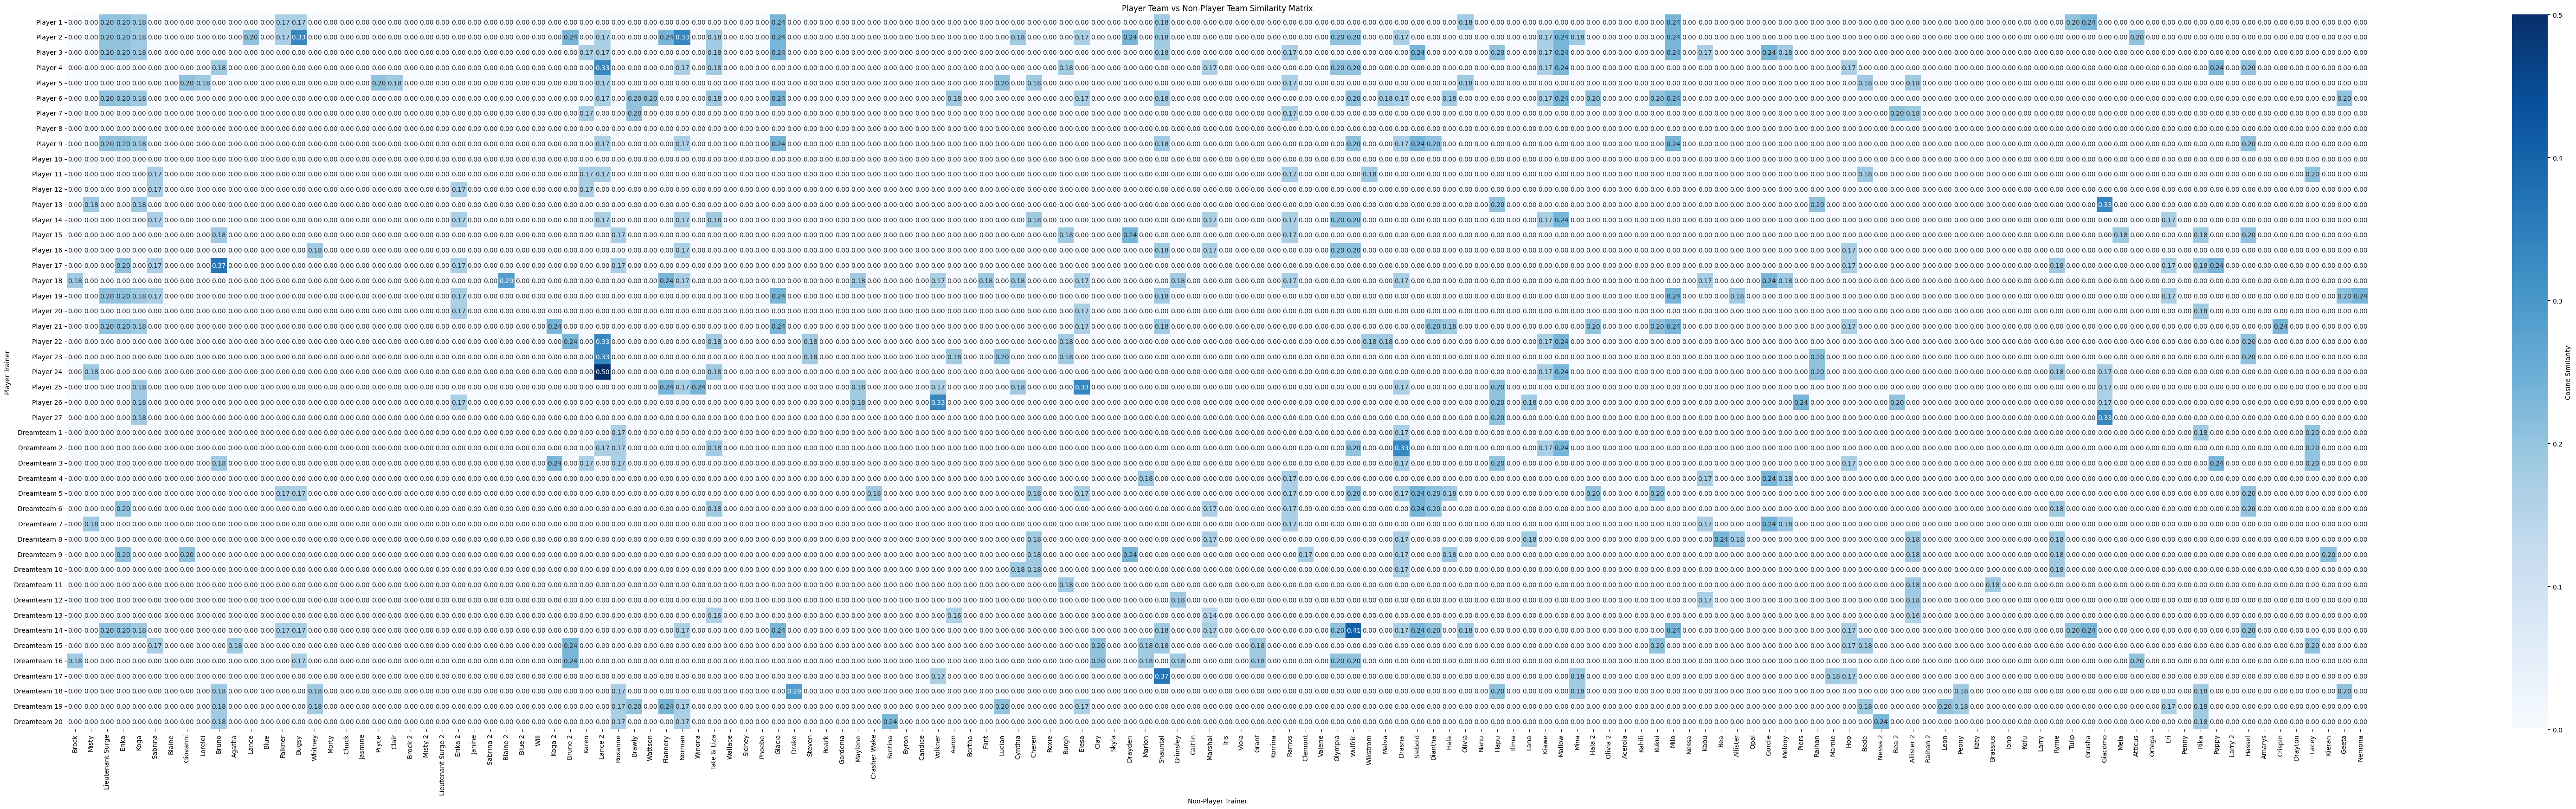

In [93]:
# Create a set of unique Pokémon names
all_pokemons = set(player_df['Pokemon'].unique()).union(set(non_player_df['Pokemon'].unique()))

# Create team vectors for each player and non_player team
def create_team_vector(df, all_pokemons):
    team_vectors = []
    for team in df.groupby('Trainer')['Pokemon']:
        team_vector = [1 if pokemon in team[1].values else 0 for pokemon in all_pokemons]
        team_vectors.append(team_vector)
    return np.array(team_vectors)

player_team_vectors = create_team_vector(player_df, all_pokemons)
non_player_team_vectors = create_team_vector(non_player_df, all_pokemons)

# Compute pairwise similarity using cosine similarity
similarity_matrix = cosine_similarity(player_team_vectors, non_player_team_vectors)

# Create a heatmap to visualize the similarity matrix
plt.figure(figsize=(80, 20))
sns.heatmap(similarity_matrix, cmap="Blues", xticklabels=non_player_df['Trainer'].unique(),
            yticklabels=player_df['Trainer'].unique(), annot=True, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title("Player Team vs Non-Player Team Similarity Matrix")
plt.xlabel("Non-Player Trainer")
plt.ylabel("Player Trainer")
plt.show()


In [94]:
# Create the types DataFrame
valid_types = non_player_df[['Type 1', 'Type 2']].stack().unique()

# Filter out "No Type" or NaN entries
valid_types = valid_types[valid_types != "No Type"]
valid_types = valid_types[~pd.isna(valid_types)]

types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types))
})

# Initialize edges list
edges = []

# Loop through each trainer (team)
for trainer, group in non_player_df.groupby('Trainer'):
    team_types = group[['Type 1', 'Type 2']].values.flatten()
    team_types = team_types[~pd.isna(team_types)]

    for type1, type2 in combinations(team_types, 2):
        edge = tuple(sorted([type1, type2]))
        if "No Type" not in edge:
            edges.append(edge)

# Create a DataFrame of edges with their weights
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
edges_count = edges_df.groupby(['source', 'target']).size().reset_index(name='weight')


# Create the types DataFrame with positions for each type
types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types)),
    'x': range(len(valid_types)),
    'y': [0] * len(valid_types)
})

# Merge the edges count with the types DataFrame to get positions
edges_count[['source', 'target']] = pd.DataFrame(edges_count[['source', 'target']].values, columns=['source', 'target'])
edges_df = edges_count.merge(types, left_on='source', right_on='type', how='left')
edges_df = edges_df.merge(types, left_on='target', right_on='type', how='left', suffixes=('_x', '_y'))

# Create a networkx graph to use spring_layout (force-directed layout)
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in edges_df.iterrows():
    G.add_node(row['source'])
    G.add_node(row['target'])
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# Calculate positions using spring_layout
pos = nx.spring_layout(G, seed=42)

# Update types DataFrame with calculated positions
types['x'] = types['type'].map(lambda t: pos.get(t, [None, None])[0])
types['y'] = types['type'].map(lambda t: pos.get(t, [None, None])[1])

# Create Altair chart for edges
edges_df['x_x'] = edges_df['source'].map(lambda t: pos.get(t, [None, None])[0])
edges_df['y_x'] = edges_df['source'].map(lambda t: pos.get(t, [None, None])[1])
edges_df['x_y'] = edges_df['target'].map(lambda t: pos.get(t, [None, None])[0])
edges_df['y_y'] = edges_df['target'].map(lambda t: pos.get(t, [None, None])[1])

# Create Altair chart for edges
edge_chart = alt.Chart(edges_df).mark_line(color='black').encode(
    x='x_x:Q',
    y='y_x:Q',
    x2='x_y:Q',
    y2='y_y:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurrence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges_df['weight'].min(), edges_df['weight'].max()], range=[0.1, 1]), title='Co-occurrence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(types).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['type'],
    color=alt.Color('type:N', scale=alt.Scale(scheme='category20'), title='Pokémon Type')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=600,
    height=600,
    title="Pokémon Type Co-Occurrence Network (Non-Players)"
)

# Remove axes and display the chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart


alt.LayerChart(...)

In [95]:
# Create the types DataFrame
valid_types = non_player_df[['Type 1', 'Type 2']].stack().unique()

# Filter out "No Type" or NaN entries
valid_types = valid_types[valid_types != "No Type"]
valid_types = valid_types[~pd.isna(valid_types)]

types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types))
})

# Initialize edges list
edges = []

# Loop through each trainer
for trainer, group in non_player_df.groupby('Trainer'):
    team_types = group[['Type 1', 'Type 2']].values.flatten()
    team_types = team_types[~pd.isna(team_types)]

    for type1, type2 in combinations(team_types, 2):
        edge = tuple(sorted([type1, type2]))
        if "No Type" not in edge:
            edges.append(edge)

# Create a DataFrame of edges with their weights
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
edges_count = edges_df.groupby(['source', 'target']).size().reset_index(name='weight')

# Add a threshold to filter out edges with weight lower than 10
edges_count = edges_count[edges_count['weight'] >= 10]

# Create the types DataFrame with positions for each type
types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types)),
    'x': range(len(valid_types)),
    'y': [0] * len(valid_types)
})

# Merge the edges count with the types DataFrame to get positions
edges_count[['source', 'target']] = pd.DataFrame(edges_count[['source', 'target']].values, columns=['source', 'target'])
edges_df = edges_count.merge(types, left_on='source', right_on='type', how='left')
edges_df = edges_df.merge(types, left_on='target', right_on='type', how='left', suffixes=('_x', '_y'))

# Create a networkx graph to use circular_layout
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in edges_df.iterrows():
    G.add_node(row['source'])
    G.add_node(row['target'])
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# Calculate positions using circular_layout
pos = nx.circular_layout(G)

# Normalize positions to fit within the chart area
x_min, x_max = min([pos[node][0] for node in pos]), max([pos[node][0] for node in pos])
y_min, y_max = min([pos[node][1] for node in pos]), max([pos[node][1] for node in pos])

# Scale positions to fit within the plot area
scale_x = 600 / (x_max - x_min)
scale_y = 600 / (y_max - y_min)

# Center the graph by shifting the node positions
offset_x = (x_max + x_min) / 2
offset_y = (y_max + y_min) / 2

# Update types DataFrame with normalized positions
types['x'] = types['type'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
types['y'] = types['type'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)

# Create Altair chart for edges (with correct positions)
edges_df['x_x'] = edges_df['source'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
edges_df['y_x'] = edges_df['source'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)
edges_df['x_y'] = edges_df['target'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
edges_df['y_y'] = edges_df['target'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)

# Create Altair chart for edges
edge_chart = alt.Chart(edges_df).mark_line(color='black').encode(
    x='x_x:Q',
    y='y_x:Q',
    x2='x_y:Q',
    y2='y_y:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurrence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges_df['weight'].min(), edges_df['weight'].max()], range=[0.1, 1]), title='Co-occurrence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(types).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['type'],
    color=alt.Color('type:N', scale=alt.Scale(scheme='category20'), title='Pokémon Type')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=600,
    height=600,
    title="Pokémon Type Co-Occurrence Network (Non-Players)"
).interactive()

# Remove axes and display the chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart

alt.LayerChart(...)

In [96]:
# Create the types DataFrame
valid_types = player_df[['Type 1', 'Type 2']].stack().unique()

# Filter out "No Type" or NaN entries
valid_types = valid_types[valid_types != "No Type"]
valid_types = valid_types[~pd.isna(valid_types)]

types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types))
})

# Initialize edges list
edges = []

# Loop through each trainer
for trainer, group in player_df.groupby('Trainer'):
    team_types = group[['Type 1', 'Type 2']].values.flatten()
    team_types = team_types[~pd.isna(team_types)]

    for type1, type2 in combinations(team_types, 2):
        edge = tuple(sorted([type1, type2]))
        if "No Type" not in edge:
            edges.append(edge)

# Create a DataFrame of edges with their weights
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
edges_count = edges_df.groupby(['source', 'target']).size().reset_index(name='weight')

# Create the types DataFrame with positions for each type
types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types)),
    'x': range(len(valid_types)),
    'y': [0] * len(valid_types)
})

# Merge the edges count with the types DataFrame to get positions
edges_count[['source', 'target']] = pd.DataFrame(edges_count[['source', 'target']].values, columns=['source', 'target'])
edges_df = edges_count.merge(types, left_on='source', right_on='type', how='left')
edges_df = edges_df.merge(types, left_on='target', right_on='type', how='left', suffixes=('_x', '_y'))

# Create a networkx graph to use spring_layout
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in edges_df.iterrows():
    G.add_node(row['source'])
    G.add_node(row['target'])
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# Calculate positions using spring_layout
pos = nx.spring_layout(G, seed=42)

# Update types DataFrame with calculated positions
types['x'] = types['type'].map(lambda t: pos.get(t, [None, None])[0])
types['y'] = types['type'].map(lambda t: pos.get(t, [None, None])[1])

# Create Altair chart for edges (with correct positions)
edges_df['x_x'] = edges_df['source'].map(lambda t: pos.get(t, [None, None])[0])
edges_df['y_x'] = edges_df['source'].map(lambda t: pos.get(t, [None, None])[1])
edges_df['x_y'] = edges_df['target'].map(lambda t: pos.get(t, [None, None])[0])
edges_df['y_y'] = edges_df['target'].map(lambda t: pos.get(t, [None, None])[1])

# Create Altair chart for edges
edge_chart = alt.Chart(edges_df).mark_line(color='black').encode(
    x='x_x:Q',
    y='y_x:Q',
    x2='x_y:Q',
    y2='y_y:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurrence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges_df['weight'].min(), edges_df['weight'].max()], range=[0.1, 1]), title='Co-occurrence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(types).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['type'],
    color=alt.Color('type:N', scale=alt.Scale(scheme='category20'), title='Pokémon Type')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=600,
    height=600,
    title="Pokémon Type Co-Occurrence Network (Players)"
)

# Remove axes and display the chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart


alt.LayerChart(...)

In [97]:
# Create the types DataFrame
valid_types = player_df[['Type 1', 'Type 2']].stack().unique()

# Filter out "No Type" or NaN entries
valid_types = valid_types[valid_types != "No Type"]
valid_types = valid_types[~pd.isna(valid_types)]

types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types))
})

# Initialize edges list
edges = []

# Loop through each trainer
for trainer, group in player_df.groupby('Trainer'):
    team_types = group[['Type 1', 'Type 2']].values.flatten()
    team_types = team_types[~pd.isna(team_types)]

    for type1, type2 in combinations(sorted(team_types), 2):
        edge = tuple([type1, type2])
        if "No Type" not in edge:
            edges.append(edge)

# Create a DataFrame of edges with their weights
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
edges_count = edges_df.groupby(['source', 'target']).size().reset_index(name='weight')

# Add a threshold filter
threshold = 10
edges_count = edges_count[edges_count['weight'] >= threshold]

# Create the types DataFrame with positions for each type
types = pd.DataFrame({
    'type': valid_types,
    'id': range(len(valid_types)),
    'x': range(len(valid_types)),
    'y': [0] * len(valid_types)
})

# Merge the edges count with the types DataFrame to get positions
edges_count[['source', 'target']] = pd.DataFrame(edges_count[['source', 'target']].values, columns=['source', 'target'])
edges_df = edges_count.merge(types, left_on='source', right_on='type', how='left')
edges_df = edges_df.merge(types, left_on='target', right_on='type', how='left', suffixes=('_x', '_y'))

# Create a networkx graph to use circular_layout
G = nx.Graph()

# Add all types as nodes
for t in types['type']:
    G.add_node(t)

# Add edges to the graph
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# Calculate positions using circular_layout
pos = nx.circular_layout(G)

# Normalize positions to fit within the chart area
x_min, x_max = min([pos[node][0] for node in pos]), max([pos[node][0] for node in pos])
y_min, y_max = min([pos[node][1] for node in pos]), max([pos[node][1] for node in pos])

# Scale positions to fit within the plot area
scale_x = 600 / (x_max - x_min)
scale_y = 600 / (y_max - y_min)

# Center the graph by shifting the node positions
offset_x = (x_max + x_min) / 2
offset_y = (y_max + y_min) / 2

# Update types DataFrame with normalized positions
types['x'] = types['type'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
types['y'] = types['type'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)

# Create Altair chart for edges (with correct positions)
edges_df['x_x'] = edges_df['source'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
edges_df['y_x'] = edges_df['source'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)
edges_df['x_y'] = edges_df['target'].map(lambda t: (pos.get(t, [None, None])[0] - offset_x) * scale_x if t in pos else None)
edges_df['y_y'] = edges_df['target'].map(lambda t: (pos.get(t, [None, None])[1] - offset_y) * scale_y if t in pos else None)

# Create Altair chart for edges
edge_chart = alt.Chart(edges_df).mark_line(color='black').encode(
    x='x_x:Q',
    y='y_x:Q',
    x2='x_y:Q',
    y2='y_y:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='log', range=[1, 6]), title='Co-occurrence'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='log', domain=[edges_df['weight'].min(), edges_df['weight'].max()], range=[0.1, 1]), title='Co-occurrence'),
    tooltip=['source', 'target', 'weight']
)

# Create Altair chart for nodes
node_chart = alt.Chart(types).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    opacity=alt.value(1),
    tooltip=['type'],
    color=alt.Color('type:N', scale=alt.Scale(scheme='category20'), title='Pokémon Type')
)

# Combine edge and node charts
network_chart = (edge_chart + node_chart).properties(
    width=600,
    height=600,
    title="Pokémon Type Co-Occurrence Network (Players)"
).interactive()

# Remove axes and display the chart
network_chart = network_chart.encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
)

network_chart


alt.LayerChart(...)

In [98]:
# Group Pokémon by trainer
trainer_pokemon = df.groupby(['Trainer', 'Role'])['Pokemon'].apply(set).reset_index()

# Build full graph
G = nx.Graph()
for _, row in trainer_pokemon.iterrows():
    G.add_node(row['Trainer'], role=row['Role'])

for i in range(len(trainer_pokemon)):
    for j in range(i + 1, len(trainer_pokemon)):
        t1 = trainer_pokemon.iloc[i]
        t2 = trainer_pokemon.iloc[j]
        common = t1['Pokemon'].intersection(t2['Pokemon'])
        if common:
            G.add_edge(t1['Trainer'], t2['Trainer'], weight=len(common))

# Keep only the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Layout
pos = nx.spring_layout(G, seed=42)

# Role colors
role_colors = {'Player': 'blue', 'Gym Leader': 'green', 'Elite Four': 'orange', 'Champion': 'red'}

# Node traces by role
node_traces = []
for role, color in role_colors.items():
    role_nodes = [node for node in G.nodes if G.nodes[node]['role'] == role]
    trace = go.Scatter(
        x=[pos[node][0] for node in role_nodes],
        y=[pos[node][1] for node in role_nodes],
        mode='markers',
        marker=dict(color=color, size=12, line=dict(width=1, color='black')),
        name=role,
        hoverinfo='text',
        hovertext=[
            f"{node}<br>Role: {G.nodes[node]['role']}<br>Connections: {G.degree[node]}"
            for node in role_nodes
        ],
        showlegend=True
    )
    node_traces.append(trace)

# Edge traces
edge_traces = []
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    weight = d['weight']
    role_u = G.nodes[u]['role']
    role_v = G.nodes[v]['role']

    edge_traces.append(go.Scatter(
        x=[x0, x1],
        y=[y0, y1],
        mode='lines',
        line=dict(
            width=1 + weight * 0.8,
            color='gray'
        ),
        opacity=min(0.2 + 0.15 * weight, 1),
        hoverinfo='text',
        text=f"{role_u} ↔ {role_v}<br>Shared Pokémon: {weight}",
        showlegend=False
    ))

# Combine and plot with white background
fig = go.Figure(data=edge_traces + node_traces,
    layout=go.Layout(
        title='Pokémon Trainer Network (Filtered to Largest Component)',
        titlefont_size=16,
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        dragmode='pan',
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
)

fig.show(config={'scrollZoom': True, 'displayModeBar': True})


In [99]:
# Group Pokémon by trainer
trainer_pokemon = df.groupby(['Trainer', 'Role'])['Pokemon'].apply(set).reset_index()

# Build full graph
G = nx.Graph()
for _, row in trainer_pokemon.iterrows():
    G.add_node(row['Trainer'], role=row['Role'])

for i in range(len(trainer_pokemon)):
    for j in range(i + 1, len(trainer_pokemon)):
        t1 = trainer_pokemon.iloc[i]
        t2 = trainer_pokemon.iloc[j]
        common = t1['Pokemon'].intersection(t2['Pokemon'])
        if len(common) >= 2:
            G.add_edge(
                t1['Trainer'],
                t2['Trainer'],
                weight=len(common),
                role_pair=f"{t1['Role']} ↔ {t2['Role']}"
            )

# Keep only the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Layout
pos = nx.spring_layout(G, seed=42)

# Define role colors
role_colors = {'Player': 'blue', 'Gym Leader': 'green', 'Elite Four': 'orange', 'Champion': 'red'}

# Create node traces grouped by role
node_traces = []
for role, color in role_colors.items():
    role_nodes = [node for node in G.nodes if G.nodes[node]['role'] == role]
    trace = go.Scatter(
        x=[pos[node][0] for node in role_nodes],
        y=[pos[node][1] for node in role_nodes],
        mode='markers',
        marker=dict(color=color, size=12, line=dict(width=1, color='black')),
        name=role,
        hoverinfo='text',
        hovertext=[f'{node} (Degree: {G.degree(node)})' for node in role_nodes],
        showlegend=True
    )
    node_traces.append(trace)

# Create edge traces with thickness and opacity based on shared Pokémon
edge_traces = []
max_weight = max([d['weight'] for _, _, d in G.edges(data=True)])
for u, v, d in G.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    opacity = 0.3 + 0.7 * (d['weight'] / max_weight)
    width = 1 + 2 * (d['weight'] / max_weight)
    edge_traces.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=width, color='gray'),
        opacity=opacity,
        hoverinfo='text',
        text=f'{d["role_pair"]}<br><b>Shared Pokémon:</b> {d["weight"]}',
        showlegend=False
    ))

# Final layout with white background
fig = go.Figure(data=edge_traces + node_traces,
    layout=go.Layout(
        title='Pokémon Trainer Network (Threshold: ≥2 Shared Pokémon)',
        titlefont_size=16,
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
)

fig.update_layout(dragmode='pan')
fig.show(config={'scrollZoom': True, 'displayModeBar': True})


In [100]:
# Count edge weights
edge_weights = df.groupby(['Trainer', 'Pokemon']).size().reset_index(name='weight')

# Create graph with weighted edges
G = nx.Graph()

for _, row in edge_weights.iterrows():
    trainer = row['Trainer']
    pokemon = row['Pokemon']
    weight = row['weight']

    G.add_node(trainer, label=trainer, type='Trainer')
    G.add_node(pokemon, label=pokemon, type='Pokemon')
    G.add_edge(trainer, pokemon, weight=weight)

# Keep only the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Layout
pos = nx.spring_layout(G, seed=42)

# Node DataFrame
nodes_df = pd.DataFrame({
    'name': list(pos.keys()),
    'x': [pos[n][0] for n in pos],
    'y': [pos[n][1] for n in pos],
    'type': [G.nodes[n]['type'] for n in pos],
    'label': [G.nodes[n]['label'] for n in pos]
})

# 2-color palette
type_colors = {'Trainer': 'steelblue', 'Pokemon': 'orange'}
nodes_df['color'] = nodes_df['type'].map(type_colors)

# Edge DataFrame with weights
edges_df = pd.DataFrame([
    {
        'source': u,
        'target': v,
        'x_x': pos[u][0],
        'y_x': pos[u][1],
        'x_y': pos[v][0],
        'y_y': pos[v][1],
        'weight': G[u][v]['weight']
    } for u, v in G.edges()
])

# Normalize edge weight for size and opacity scaling
max_weight = edges_df['weight'].max()
edges_df['opacity'] = edges_df['weight'] / max_weight
edges_df['size'] = edges_df['weight'] * 1.2

# Edge chart
edge_chart = alt.Chart(edges_df).mark_line().encode(
    x=alt.X('x_x:Q', axis=None),
    y=alt.Y('y_x:Q', axis=None),
    x2='x_y:Q',
    y2='y_y:Q',
    tooltip=['source:N', 'target:N', 'weight:Q'],
    size=alt.Size('size:Q', legend=None),
    opacity=alt.Opacity('opacity:Q', legend=None)
)

# Node chart
node_chart = alt.Chart(nodes_df).mark_circle(opacity=1).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None),
    color=alt.condition(
        alt.datum.type == 'Trainer',
        alt.value('red'),
        alt.value('white')
    ),
    stroke=alt.condition(
        alt.datum.type == 'Pokemon',
        alt.value('black'),
        alt.value(None)
    ),
    tooltip=['label:N', 'type:N'],
    size=alt.value(100)
)


# Combine and display
network_chart = (edge_chart + node_chart).properties(
    width=900,
    height=600,
    title='Trainer–Pokémon Network (Weighted Edges)'
).interactive()

network_chart


alt.LayerChart(...)

In [101]:
# Altair setup
alt.data_transformers.disable_max_rows()

# Load dataset
df = pd.read_csv('pokemon_ds.csv', sep=';')

# Adjust player roles
df['Adjusted Role'] = df.apply(
    lambda row: 'Player - Dreamteam' if 'Dreamteam' in row['Trainer'] and row['Role'] == 'Player'
    else 'Player - In-Game-Teams' if row['Role'] == 'Player'
    else row['Role'],
    axis=1
)

# Type advantage dictionary
type_advantages = {
    "Normal": [], "Fire": ["Grass", "Bug", "Ice", "Steel"], "Water": ["Fire", "Ground", "Rock"],
    "Electric": ["Water", "Flying"], "Grass": ["Water", "Ground", "Rock"], "Ice": ["Grass", "Ground", "Flying", "Dragon"],
    "Fighting": ["Normal", "Ice", "Rock", "Dark", "Steel"], "Poison": ["Grass", "Fairy"], "Ground": ["Fire", "Electric", "Poison", "Rock", "Steel"],
    "Flying": ["Grass", "Fighting", "Bug"], "Psychic": ["Fighting", "Poison"], "Bug": ["Grass", "Psychic", "Dark"],
    "Rock": ["Fire", "Ice", "Flying", "Bug"], "Ghost": ["Psychic", "Ghost"], "Dragon": ["Dragon"],
    "Dark": ["Psychic", "Ghost"], "Steel": ["Ice", "Rock", "Fairy"], "Fairy": ["Fighting", "Dragon", "Dark"]
}

# Top 10 Pokémon per role
top_pokemon = (
    df.groupby('Adjusted Role')
    .apply(lambda g: g['Pokemon'].value_counts().head(10).index.tolist())
    .reset_index()
    .explode(0)
    .rename(columns={0: 'Pokemon'})
)

# Merge with types
top_df = df.merge(top_pokemon, on=['Adjusted Role', 'Pokemon'])
top_df = top_df[['Adjusted Role', 'Pokemon', 'Type 1', 'Type 2']].drop_duplicates()
top_df['Types'] = top_df[['Type 1', 'Type 2']].values.tolist()
top_df['Types'] = top_df['Types'].apply(lambda x: [t for t in x if pd.notna(t)])

# Group role to types
role_types = top_df.groupby('Adjusted Role')['Types'].sum().apply(set).to_dict()
roles = list(role_types.keys())

# Create directed graph with clean direction
G = nx.DiGraph()
for r in roles:
    G.add_node(r)

for a in roles:
    for b in roles:
        if a == b:
            continue

        a_adv = sum(
            1 for ta in role_types[a] if ta in type_advantages
            for tb in role_types[b] if tb in type_advantages[ta]
        )
        b_adv = sum(
            1 for tb in role_types[b] if tb in type_advantages
            for ta in role_types[a] if ta in type_advantages[tb]
        )

        if a_adv > b_adv:
            G.add_edge(a, b, weight=a_adv, winner=a)
        elif b_adv > a_adv:
            G.add_edge(b, a, weight=b_adv, winner=b)

# Layout
pos = nx.circular_layout(G)

# Calculate total wins for each role
total_wins = {role: 0 for role in roles}
for u, v, d in G.edges(data=True):
    total_wins[u] += d['weight']

# Scale node size manually based on wins
min_win = min(total_wins.values())
max_win = max(total_wins.values())
scaled_wins = {
    name: 500 + 4500 * ((total_wins[name] - min_win) / (max_win - min_win)) if max_win != min_win else 3000
    for name in G.nodes
}

# Node DataFrame
nodes_df = pd.DataFrame({
    'name': list(G.nodes),
    'x': [pos[n][0] for n in G.nodes],
    'y': [pos[n][1] for n in G.nodes],
    'wins': [total_wins[n] for n in G.nodes],
    'size': [scaled_wins[n] for n in G.nodes]
})

# Edge DataFrame
edges_df = pd.DataFrame([
    {
        'source': u,
        'target': v,
        'weight': d['weight'],
        'winner': d['winner'],
        'x_x': pos[u][0], 'y_x': pos[u][1],
        'x_y': pos[v][0], 'y_y': pos[v][1],
    } for u, v, d in G.edges(data=True)
])

# Axis config
x_axis = alt.Axis(labels=False, ticks=False, domain=False, title=None, grid=True, gridColor='white')
y_axis = alt.Axis(labels=False, ticks=False, domain=False, title=None, grid=True, gridColor='white')

# Edge chart with dynamic edge thickness
edge_chart = alt.Chart(edges_df).mark_line().encode(
    x=alt.X('x_x:Q', axis=x_axis),
    y=alt.Y('y_x:Q', axis=y_axis),
    x2='x_y:Q', y2='y_y:Q',
    size=alt.Size('weight:Q',
        scale=alt.Scale(domain=[edges_df['weight'].min(), edges_df['weight'].max()], range=[1, 10]),
        legend=None
    ),
    color=alt.value('black'),
    tooltip=[
        alt.Tooltip('source:N', title='Source'),
        alt.Tooltip('target:N', title='Target'),
        alt.Tooltip('weight:Q', title='Advantage Count'),
        alt.Tooltip('winner:N', title='Winner')
    ]
)

# Node chart with pre-scaled circle sizes
node_chart = alt.Chart(nodes_df).mark_circle().encode(
    x=alt.X('x:Q', axis=x_axis),
    y=alt.Y('y:Q', axis=y_axis),
    size=alt.Size('size:Q', legend=None),
    color=alt.Color('name:N', title='Role'),
    tooltip=[
        alt.Tooltip('name:N', title='Role'),
        alt.Tooltip('wins:Q', title='Total Type Wins')
    ]
)

# Combine & show
(edge_chart + node_chart).properties(
    width=700,
    height=550,
    title='Type Advantage Network (Top 10 Pokémon per Role, Node Size = Wins)'
).configure_view(
    stroke=None
).interactive()


<ipython-input-101-037055157351>:28: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



alt.LayerChart(...)

In [102]:
# Altair setup
alt.data_transformers.disable_max_rows()

# Load dataset
df = pd.read_csv('pokemon_ds.csv', sep=';')

# Adjust roles
df['Adjusted Role'] = df.apply(
    lambda row: 'Player - Dreamteam' if 'Dreamteam' in row['Trainer'] and row['Role'] == 'Player'
    else 'Player - In-Game-Teams' if row['Role'] == 'Player'
    else row['Role'],
    axis=1
)

# Pokémon per role
role_pokemon = df.groupby('Adjusted Role')['Pokemon'].apply(set).to_dict()
roles = list(role_pokemon.keys())

# Build graph
G = nx.Graph()
for r in roles:
    G.add_node(r)

for i in range(len(roles)):
    for j in range(i + 1, len(roles)):
        r1, r2 = roles[i], roles[j]
        shared = role_pokemon[r1].intersection(role_pokemon[r2])
        if shared:
            min_size = min(len(role_pokemon[r1]), len(role_pokemon[r2]))
            percent = round(len(shared) / min_size * 100, 2)
            G.add_edge(r1, r2, percent=percent, shared_pokemon=list(shared))

# Layout
pos = nx.circular_layout(G)

# Recompute correct node percent
shared_sets = {role: set() for role in roles}
for u, v, d in G.edges(data=True):
    shared_sets[u].update(d['shared_pokemon'])
    shared_sets[v].update(d['shared_pokemon'])

true_percent_shared = {
    role: round(len(shared_sets[role]) / len(role_pokemon[role]) * 100, 2)
    for role in roles
}

# Scale node size manually
min_val = min(true_percent_shared.values())
max_val = max(true_percent_shared.values())
scaled_sizes = {
    r: 500 + 4500 * ((true_percent_shared[r] - min_val) / (max_val - min_val)) if max_val != min_val else 3000
    for r in roles
}

# Build node DataFrame
nodes_df = pd.DataFrame({
    'name': roles,
    'x': [pos[r][0] for r in roles],
    'y': [pos[r][1] for r in roles],
    'total_shared': [true_percent_shared[r] for r in roles],
    'scaled_size': [scaled_sizes[r] for r in roles]
})

# Build edge DataFrame
edges_df = pd.DataFrame([
    {
        'source': u,
        'target': v,
        'percent': d['percent'],
        'shared': ", ".join(d['shared_pokemon']),
        'x_x': pos[u][0], 'y_x': pos[u][1],
        'x_y': pos[v][0], 'y_y': pos[v][1]
    }
    for u, v, d in G.edges(data=True)
])

# Axis formatting
x_axis = alt.Axis(labels=False, ticks=False, domain=False, title=None, grid=True, gridColor='white')
y_axis = alt.Axis(labels=False, ticks=False, domain=False, title=None, grid=True, gridColor='white')

# Edge chart
edge_chart = alt.Chart(edges_df).mark_line().encode(
    x=alt.X('x_x:Q', axis=x_axis),
    y=alt.Y('y_x:Q', axis=y_axis),
    x2='x_y:Q',
    y2='y_y:Q',
    size=alt.Size('percent:Q',
        scale=alt.Scale(domain=[edges_df['percent'].min(), edges_df['percent'].max()], range=[1, 10]),
        legend=None
    ),
    color=alt.value('black'),
    tooltip=[
        alt.Tooltip('source:N', title='Source'),
        alt.Tooltip('target:N', title='Target'),
        alt.Tooltip('percent:Q', title='% Shared Pokémon'),
        alt.Tooltip('shared:N', title='Shared Pokémon')
    ]
)

# Node chart
node_chart = alt.Chart(nodes_df).mark_circle().encode(
    x=alt.X('x:Q', axis=x_axis),
    y=alt.Y('y:Q', axis=y_axis),
    size=alt.Size('scaled_size:Q', legend=None),
    color=alt.Color('name:N', title='Role'),
    tooltip=[
        alt.Tooltip('name:N', title='Role'),
        alt.Tooltip('total_shared:Q', title='% Shared')
    ]
)

# Combine & display
(edge_chart + node_chart).properties(
    width=700,
    height=550,
    title='Pokémon Sharing Role Groups'
).configure_view(
    stroke=None
).interactive()


alt.LayerChart(...)

In [103]:
# Pokémon sets per trainer
trainer_pokemon = df.groupby('Trainer')['Pokemon'].apply(set)

# Identify player trainers
player_trainers = [t for t in trainer_pokemon.index if "Dreamteam" not in t and "Player" in t]
dreamteam_trainers = [t for t in trainer_pokemon.index if "Dreamteam" in t]

player_pokemon_set = set().union(*[trainer_pokemon[t] for t in player_trainers])
dreamteam_pokemon_set = set().union(*[trainer_pokemon[t] for t in dreamteam_trainers])

# Overlap with non-player trainers
non_player_df = df[df['Role'] != 'Player']
non_player_trainers = non_player_df['Trainer'].unique()

overlaps = []
for trainer in non_player_trainers:
    if trainer not in trainer_pokemon:
        continue
    pokes = trainer_pokemon[trainer]
    overlap_player = len(pokes & player_pokemon_set)
    overlap_dream = len(pokes & dreamteam_pokemon_set)
    total_overlap = overlap_player + overlap_dream
    role = non_player_df[non_player_df['Trainer'] == trainer]['Role'].iloc[0]
    if total_overlap > 0:
        overlaps.append({
            'Trainer': trainer,
            'Role': role,
            'Overlap_Player': overlap_player,
            'Overlap_Dreamteam': overlap_dream,
            'Total_Overlap': total_overlap
        })

# Prepare top 20 trainers
overlap_df = pd.DataFrame(overlaps).sort_values('Total_Overlap', ascending=False).head(20)

# Create edges from Player/Dreamteam to top trainers
edges = []
for _, row in overlap_df.iterrows():
    if row['Overlap_Player'] > 0:
        edges.append({'source': 'Player', 'target': row['Trainer'], 'weight': row['Overlap_Player']})
    if row['Overlap_Dreamteam'] > 0:
        edges.append({'source': 'Dreamteam', 'target': row['Trainer'], 'weight': row['Overlap_Dreamteam']})
edges_df = pd.DataFrame(edges)

# Layout for nodes and compute positions
top_sorted_trainers = overlap_df.sort_values('Total_Overlap', ascending=False).reset_index(drop=True)
top_sorted_trainers['rank'] = top_sorted_trainers.index

# Total overlap for Player nodes
player_total = sum(row['weight'] for row in edges if row['source'] == 'Player')
dream_total = sum(row['weight'] for row in edges if row['source'] == 'Dreamteam')

# Build nodes DataFrame with color control
nodes_fixed = pd.DataFrame({
    'node': ['Player', 'Dreamteam'] + top_sorted_trainers['Trainer'].tolist(),
    'group': ['Player', 'Player'] + ['Non-Player'] * len(top_sorted_trainers),
    'role': ['Aggregated Player', 'Aggregated Dreamteam'] + top_sorted_trainers['Role'].tolist(),
    'color_role': ['Player', 'Player'] + top_sorted_trainers['Role'].tolist(),
    'total_shared': [player_total, dream_total] + list(top_sorted_trainers['Total_Overlap']),
    'x': [-1, -1] + [1] * len(top_sorted_trainers),
    'y': [len(top_sorted_trainers) * 0.75, -len(top_sorted_trainers) * 0.75] +
         list((len(top_sorted_trainers) - 1 - top_sorted_trainers['rank']) * 1.5 - len(top_sorted_trainers) * 0.75)
})

# Map node positions to edges
edges_df['x_x'] = edges_df['source'].map(nodes_fixed.set_index('node')['x'])
edges_df['y_x'] = edges_df['source'].map(nodes_fixed.set_index('node')['y'])
edges_df['x_y'] = edges_df['target'].map(nodes_fixed.set_index('node')['x'])
edges_df['y_y'] = edges_df['target'].map(nodes_fixed.set_index('node')['y'])

# Altair visualization
edge_chart = alt.Chart(edges_df).mark_line().encode(
    x='x_x:Q', y='y_x:Q', x2='x_y:Q', y2='y_y:Q',
    size=alt.Size('weight:Q', scale=alt.Scale(type='linear', range=[1, 6]), title='Shared Pokémon'),
    opacity=alt.Opacity('weight:Q', scale=alt.Scale(type='linear', range=[0.4, 1]), title='Shared Pokémon'),
    tooltip=['source', 'target', 'weight']
)

node_chart = alt.Chart(nodes_fixed).mark_point(filled=True, size=300).encode(
    x='x:Q',
    y='y:Q',
    color=alt.Color('color_role:N', scale=alt.Scale(scheme='category10'), title='Role'),
    tooltip=['node', 'role', 'total_shared']
)

# Final chart
network_chart = (edge_chart + node_chart).properties(
    width=800,
    height=800,
    title="Shared Pokémon Network: Player vs Top 20 Non_players"
).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None)
).interactive()

# Show chart
network_chart.display()


alt.LayerChart(...)